# Probability & Information Theory

http://egrcc.github.io/docs/dl/deeplearningbook-prob.pdf

In [1]:
import numpy as np
import scipy.stats as st
from math import factorial

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = 'AMD'

start = '2020-01-01'
end = '2022-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [3]:
dataset['Returns'] = dataset['Adj Close'].pct_change() 

In [4]:
dataset['Returns'] = dataset['Adj Close'].dropna()

In [5]:
Returns = np.array(dataset['Returns'])
Open = np.array(dataset['Open'])
Close = np.array(dataset['Adj Close'])
High = np.array(dataset['High'])
Low = np.array(dataset['Low'])

# 52 Cards in a Set

#### There are 13 cards of each suit, consisting of 1 Ace, 3 face cards, and 9 number cards. There are 4 Aces, 12 face cards, and 36 number cards in a 52 card deck. The number of spades, hearts, diamonds, and clubs is same in every pack of 52 cards.

In [6]:
# Number of cards
cards = 52 
# Outcomes (Number of Aces)
aces = 4
# Divide possible outcomes by the Number of Cards 
ace_probability = aces / cards
# Print probability rounded to two decimal places
ace_probability_percent = ace_probability * 100
print(str(round(ace_probability_percent, 0)) + '%')

8.0%


## Apply Stock data to probability

In [7]:
import collections

print([item for item, count in collections.Counter(Close).items() if count > 1])


[53.79999923706055, 45.47999954223633, 52.38999938964844, 53.189998626708984, 56.38999938964844, 85.30999755859375, 86.70999908447266, 81.83999633789062, 82.41999816894531, 81.08999633789062, 82.54000091552734, 78.05999755859375, 81.55999755859375, 81.3499984741211, 81.43000030517578, 92.66000366210938, 79.05999755859375, 82.76000213623047, 78.55000305175781, 106.1500015258789]


In [8]:
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) * 100
    return round(probability, 1)

In [9]:
# Sample Space
stock_data = len(Close)

# Determine the probability of drawing a particular number
lowest = 45.47999954223633
lowest_probability = event_probability(lowest,stock_data)

# Determine the probability of drawing a particular number
middle = 81.83999633789062
middle_probability = event_probability(middle, stock_data)

# Determine the probability of drawing a particular number
highest = 106.1500015258789
highest_probability = event_probability(highest, stock_data)

# Print each probability
print(str(lowest_probability) + '%')
print(str(middle_probability) + '%')
print(str(highest_probability) + '%')

9.0%
16.2%
21.0%


In [10]:
# Sample Space
stock_data = len(Close)

# Outcomes
lowest = 45.47999954223633
highest = 106.1500015258789

# Probability of one red
lowest_probability = lowest / stock_data
highest_probability = highest / stock_data
lowest_highest = lowest_probability * highest_probability

# Lowest and Highest Probability Percent Code
lowest_highest_probability_percent = lowest_highest * 100
print(round(lowest_highest_probability_percent, 1))



1.9


In [11]:
lowest_probability

0.09005940503413135

In [12]:
highest_probability

0.2101980228235226

### Flip coins Probability

https://www.fourmilab.ch/rpkp/experiments/statistics.html

In [13]:
n = len(Close) 
get_sum = sum(Close) 
mean = get_sum / n 
print('Average:', mean)

Average: 83.34762375331161


In [14]:
Close.sort() 
if n % 2 == 0: 
    median1 = Close[n//2] 
    median2 = Close[n//2 - 1] 
    median = (median1 + median2)/2
else: 
    median = Close[n//2] 
print('Median:', median)

Median: 82.23999786376953


In [15]:

from collections import Counter 

data = Counter(Close) 
get_mode = dict(data) 
for k,v in get_mode.items():
    if v==max(list(data.values())):
        mode = k
print('Mode:', mode)      



Mode: 106.1500015258789


In [16]:
minimum = min(Close)
maximum = max(Close)
range_numbers = maximum - minimum
print('Range Number:', range_numbers)

Range Number: 123.20000457763672


In [17]:
variance= np.var(Close)
print('Variance:', variance)

Variance: 734.095036534412


In [18]:
std = np.sqrt(variance)
print('Standard Deviation:', std)

Standard Deviation: 27.094188242765494


In [19]:
# Common Stock Number

num = np.array([53.79999923706055, 45.47999954223633, 52.38999938964844, 53.189998626708984, 56.38999938964844, 85.30999755859375, 86.70999908447266, 81.83999633789062, 82.41999816894531, 81.08999633789062, 82.54000091552734, 78.05999755859375, 81.55999755859375, 81.3499984741211, 81.43000030517578, 92.66000366210938, 79.05999755859375, 82.76000213623047, 78.55000305175781, 106.1500015258789])

In [20]:
heads_count = [np.random.binomial(n, 0.5) for n in num]
heads_count

[17,
 22,
 27,
 21,
 25,
 40,
 47,
 40,
 40,
 47,
 42,
 32,
 43,
 44,
 39,
 39,
 43,
 46,
 42,
 52]

In [21]:
proportion_heads = heads_count/num
proportion_heads

array([0.31598513, 0.48372912, 0.51536553, 0.39481106, 0.44334102,
       0.46887822, 0.54203668, 0.48875858, 0.48531911, 0.57960294,
       0.50884419, 0.40994108, 0.52721924, 0.54087278, 0.47893896,
       0.42089357, 0.54389073, 0.55582406, 0.53469126, 0.48987281])

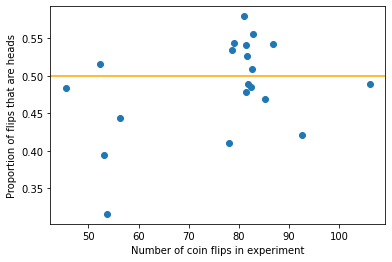

In [22]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(num, proportion_heads)

In [23]:
n_experiments = 30 # times with stock data
stock_count = np.random.binomial(max(Close), 0.5, n_experiments)

In [24]:
stocks, event_count = np.unique(stock_count, return_counts=True)

In [25]:
stocks

array([69, 70, 71, 72, 74, 75, 77, 78, 79, 80, 81, 84, 85, 86, 88, 93, 95])

In [26]:
event_count

array([1, 2, 1, 1, 2, 2, 3, 2, 1, 4, 3, 1, 1, 2, 2, 1, 1], dtype=int64)

In [27]:
event_proba = event_count/n_experiments
event_proba



array([0.03333333, 0.06666667, 0.03333333, 0.03333333, 0.06666667,
       0.06666667, 0.1       , 0.06666667, 0.03333333, 0.13333333,
       0.1       , 0.03333333, 0.03333333, 0.06666667, 0.06666667,
       0.03333333, 0.03333333])

Text(0.5, 1.0, 'Number of probability')

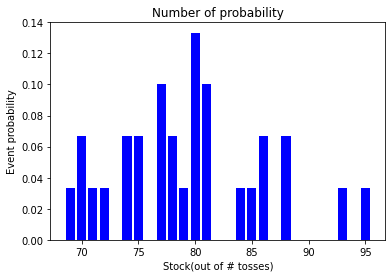

In [28]:
plt.bar(stocks, event_proba, color='blue')
plt.xlabel('Stock(out of # tosses)')
plt.ylabel('Event probability')
plt.title('Number of probability')

In [29]:
x = st.skewnorm.rvs(Close, size=len(Close)) 

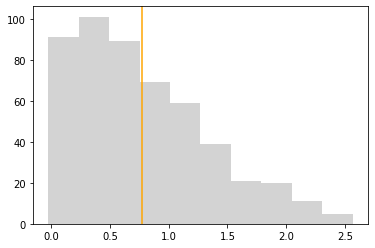

In [30]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

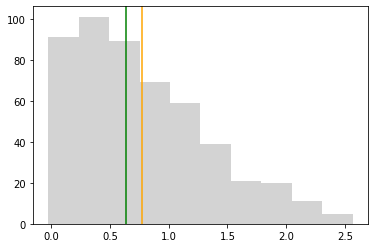

In [31]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')



### Quantiles

In [32]:
np.median(x)



0.6399907852948225

In [33]:
np.quantile(x, 0.5)


0.6399907852948225

### Percentiles

In [34]:
p = np.percentile(x, [95, 99])
p

array([1.94402671, 2.30093588])

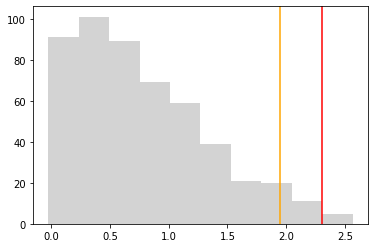

In [35]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

In [36]:
np.quantile(x, [.95, .99])

array([1.94402671, 2.30093588])

In [37]:
q = np.percentile(x, [25, 50, 75])
q

array([0.31207158, 0.63999079, 1.10079153])

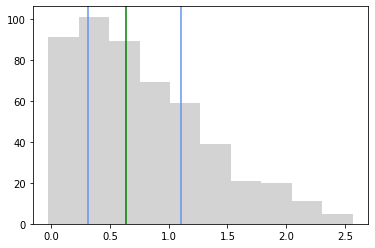

In [38]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

In [39]:
### Deciles

In [40]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.14046903, 0.25829002, 0.36494325, 0.51222845, 0.63999079,
       0.82923828, 1.01515895, 1.22400618, 1.59131215])

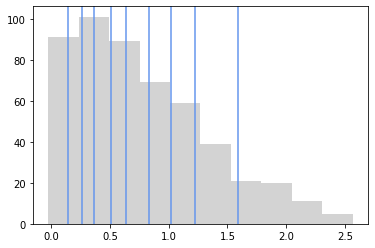

In [41]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')


### Box-and-Whisker Plot

<AxesSubplot:>

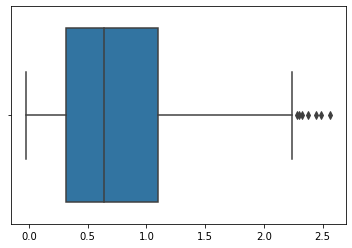

In [42]:
sns.boxplot(x=x)

### Box edges and median are determined by quartiles

In [43]:
# Box edges define the inter-quartile range (IQR)
r = max(q) - min(q)
r

0.788719954777603

In [44]:
# 1.5 x IQR
min(q) - 1.5*r

-0.8710083530349307

In [45]:
# whisker is plotted where that lowest value
np.min(x)

-0.025906225813415784

In [46]:
# upper whisker 
max(q) + 1.5*r

2.2838714660754813

In [47]:
# outliers and are plotted as individual points
x.sort()
x[-15:]

array([2.08805569, 2.09377662, 2.09831279, 2.12729924, 2.13367388,
       2.16912995, 2.19351886, 2.23707502, 2.28443646, 2.30162336,
       2.32226748, 2.3748484 , 2.44857933, 2.48956008, 2.56614424])

### Measures of Dispersion

In [48]:
xbar = np.mean(x)
xbar

0.7720170993889658

In [49]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [50]:
squared_differences[0:10]

[0.6366816329020256,
 0.5822095271624653,
 0.5763158574200933,
 0.5720929827648789,
 0.5672677139992549,
 0.5651845877975351,
 0.5629305115970004,
 0.5580837275650313,
 0.557868666025207,
 0.5459706795516376]

In [51]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.3211611007227368

In [52]:
np.var(x)

0.32116110072273685

In [53]:
sigma = sigma_squared**(1/2)
sigma

0.5667107734309775

In [54]:
np.std(x)

0.5667107734309776

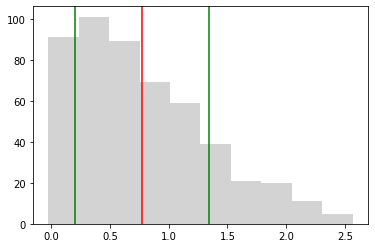

In [55]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='red')
plt.axvline(x = xbar+sigma, color='green')
plt.axvline(x = xbar-sigma, color='green')
_ = plt.hist(x, color = 'lightgray')

In [56]:
sigma/(len(x))**(1/2)

0.025218298429683705

In [57]:
# defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of Machine Learning
st.sem(x)

0.025243304185385607

In [58]:
# 0 degrees of freedom (n)
st.sem(x, ddof=0) 

0.025218298429683712

### The Central Limit Theorem

In [59]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample



array([0.73153454, 0.45362994, 0.18056305, 0.40398638, 0.97167047,
       1.72945773, 0.98362659, 0.11974462, 1.16815966, 0.28569115])

In [60]:
np.mean(x_sample)



0.7028064146426463

In [61]:
# sampling distributions of 

def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means



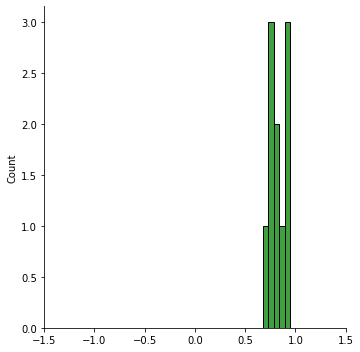

In [62]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

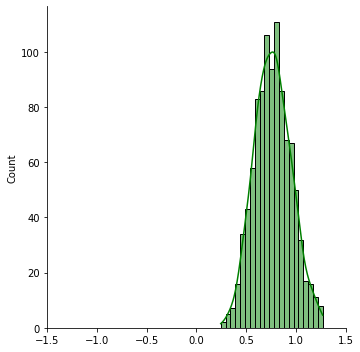

In [63]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

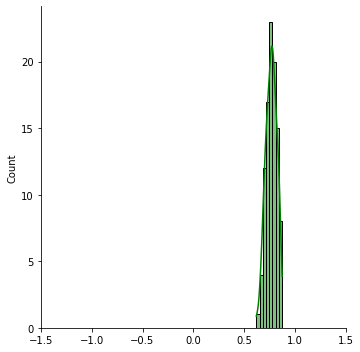

In [64]:
sns.displot(sample_mean_calculator(x, 100, 100), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

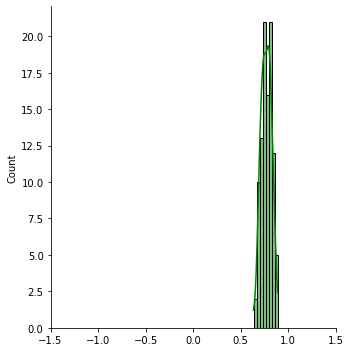

In [65]:
sns.displot(sample_mean_calculator(x, 100, 100), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)